<a href="https://colab.research.google.com/github/ArulselvanMadhavan/CSC508/blob/main/DecisionTree_Hungarian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]
data = pd.read_csv('https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/processed.hungarian.data.txt',header=None,names=columns)

In [6]:
data.describe()

,Age,Sex,Chest_pain_type,Oldpeak,Diag
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


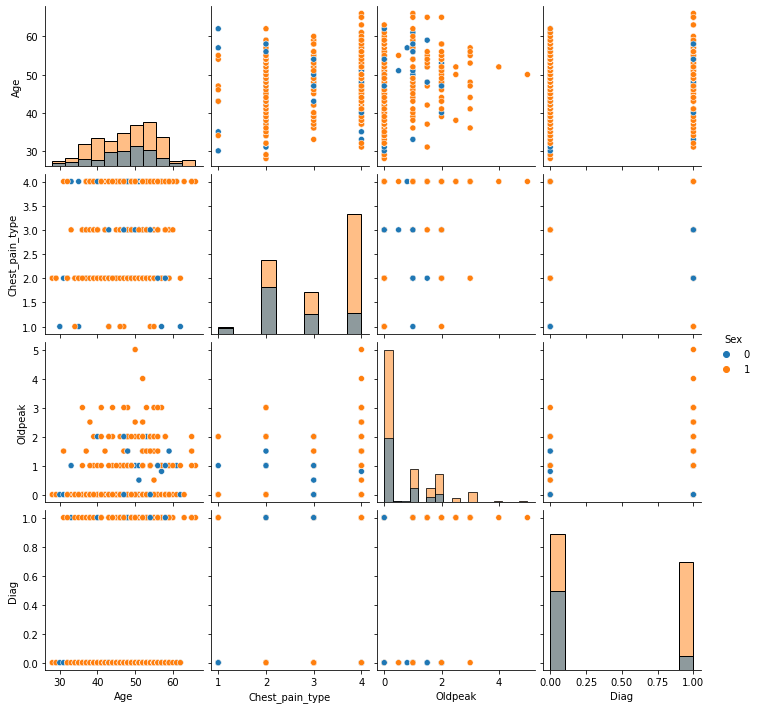

In [7]:
import seaborn as sns
sns.pairplot(data, diag_kind = 'hist', hue = "Sex")

In [8]:
data["Diag"].value_counts()

0    188
1    106
Name: Diag, dtype: int64

In [9]:
data.dtypes

Age                  int64
Sex                  int64
Chest_pain_type      int64
At_rest_bp          object
Cholesterol         object
Fast_blood_sug      object
Rest_ecg            object
Maxhr               object
Exer_angina         object
Oldpeak            float64
Slope               object
Ca                  object
Thal                object
Diag                 int64
dtype: object

In [10]:
(data=='?').sum()

Age                  0
Sex                  0
Chest_pain_type      0
At_rest_bp           1
Cholesterol         23
Fast_blood_sug       8
Rest_ecg             1
Maxhr                1
Exer_angina          1
Oldpeak              0
Slope              190
Ca                 291
Thal               266
Diag                 0
dtype: int64

In [11]:
missing_values = data.loc[(data['Thal'] == "?") | (data['Ca'] == "?")]
missing_values

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [12]:
data.count()

Age                294
Sex                294
Chest_pain_type    294
At_rest_bp         294
Cholesterol        294
Fast_blood_sug     294
Rest_ecg           294
Maxhr              294
Exer_angina        294
Oldpeak            294
Slope              294
Ca                 294
Thal               294
Diag               294
dtype: int64

In [14]:
(data=='?').sum()

Age                  0
Sex                  0
Chest_pain_type      0
At_rest_bp           1
Cholesterol         23
Fast_blood_sug       8
Rest_ecg             1
Maxhr                1
Exer_angina          1
Oldpeak              0
Slope              190
Ca                 291
Thal               266
Diag                 0
dtype: int64

In [25]:
cleaned_data = data.drop(['Ca', 'Thal', 'Slope'], axis=1)
(cleaned_data=='?').sum()

Age                 0
Sex                 0
Chest_pain_type     0
At_rest_bp          1
Cholesterol        23
Fast_blood_sug      8
Rest_ecg            1
Maxhr               1
Exer_angina         1
Oldpeak             0
Diag                0
dtype: int64

In [26]:
cleaned_data = cleaned_data.replace('?', np.nan)
for col in ['At_rest_bp', 'Cholesterol','Fast_blood_sug','Rest_ecg','Maxhr','Exer_angina']:
  cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].median())

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Diag               0
dtype: int64

In [28]:
labels = np.array(cleaned_data["Diag"])
features = cleaned_data.drop(columns='Diag')

In [29]:
features

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak
0,28,1,2,130,132,0,2,185,0,0.0
1,29,1,2,120,243,0,0,160,0,0.0
2,29,1,2,140,243,0,0,170,0,0.0
3,30,0,1,170,237,0,1,170,0,0.0
4,31,0,2,100,219,0,1,150,0,0.0
...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5
290,54,0,3,130,294,0,1,100,1,0.0
291,56,1,4,155,342,1,0,150,1,3.0
292,58,0,2,180,393,0,0,110,1,1.0


In [30]:
X = features
y = labels
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [31]:

print("number patients with no heart disease = " + str(np.count_nonzero(y==0)))
print("number patients with heart disease = " + str(np.count_nonzero(y==1)))

number patients with no heart disease = 188
number patients with heart disease = 106


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, shuffle=True) # 70% training and 30% test

In [33]:
X_test

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak
128,52,1,2,140,100,0,0,138,1,0.0
206,48,1,4,106,263,1,0,110,0,0.0
219,57,1,2,140,265,0,1,145,1,1.0
7,32,1,2,125,254,0,0,155,0,0.0
171,57,0,1,130,308,0,0,98,0,1.0
...,...,...,...,...,...,...,...,...,...,...
280,43,1,4,140,288,0,0,135,1,2.0
153,54,1,3,120,217,0,0,137,0,0.0
71,45,0,2,130,237,0,0,170,0,0.0
273,56,1,4,170,388,0,1,122,1,2.0


In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
# Look at the predicted values. Remember, 0 means no constricted vessels, 1 means at least one.  
print(y_pred)
# And the real values. 
print(y_test)
# Notice that the 2nd and 3rd patient were misclassified.

[1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1]
[0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1]


In [37]:
print(np.count_nonzero(np.logical_and(y_test == 1, y_pred == 1)))

19


[[45 13]
 [12 19]]


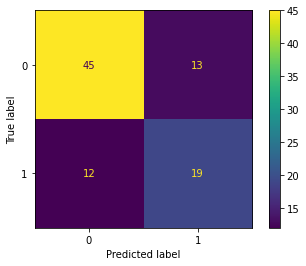

In [38]:
print(metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(clf, X_test, y_test)

In [40]:
acc = round(100 * metrics.accuracy_score(y_test, y_pred),2)
acc

71.91

In [41]:
safety = 19/(19+12)
efficiency = 45/(45+13)
safety,efficiency

(0.6129032258064516, 0.7758620689655172)

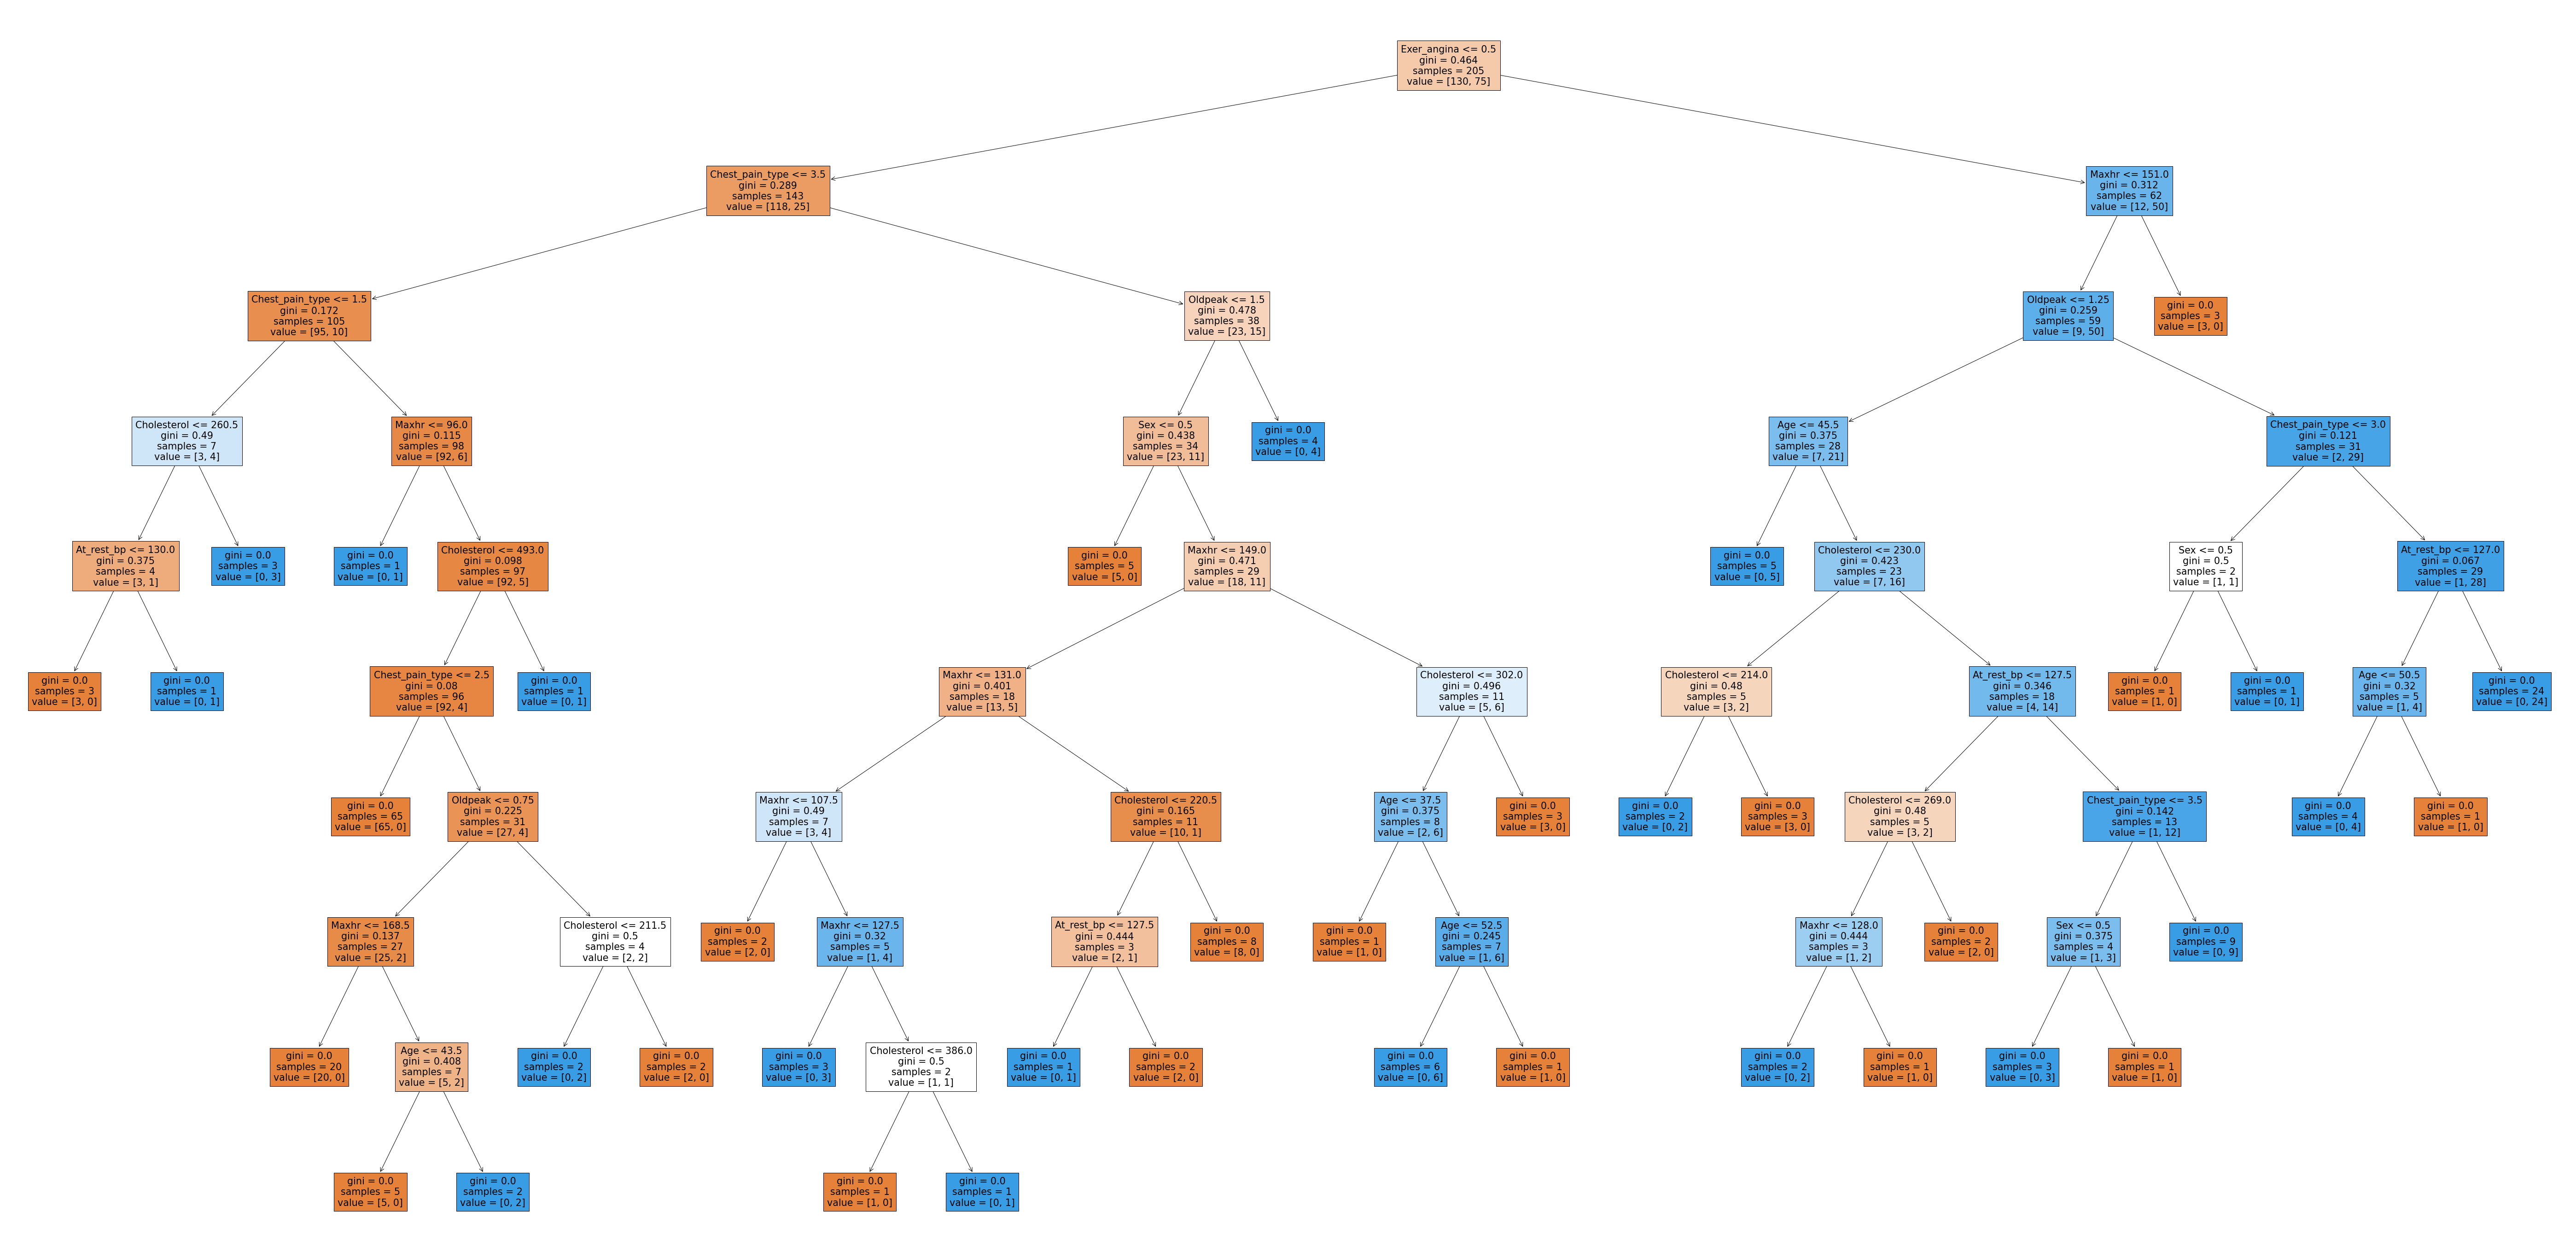

In [42]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(clf, 
                   feature_names=features.columns,  
                   filled=True)